## 8. 完整策略

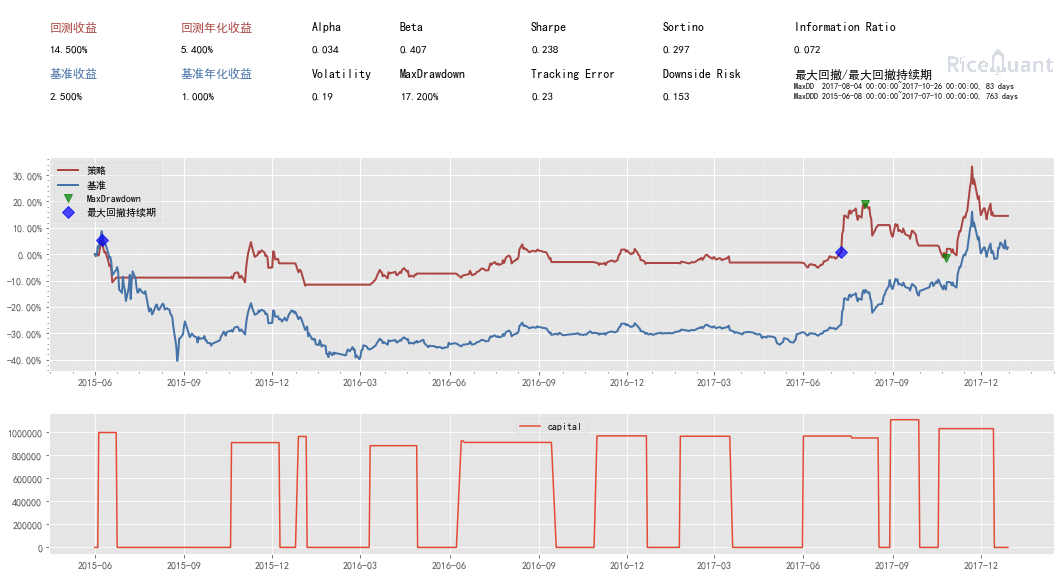

{'sys_analyser': {'benchmark_portfolio':                  cash  market_value  static_unit_net_value  total_value  \
  date                                                                      
  2015-06-01      1.300    999998.700                  1.000  1000000.000   
  2015-06-02      1.300    991822.610                  1.000   991823.910   
  2015-06-03      1.300    995596.190                  0.992   995597.490   
  2015-06-04      1.300   1029558.410                  0.996  1029559.710   
  2015-06-05      1.300   1025155.900                  1.030  1025157.200   
  2015-06-08      1.300   1087419.970                  1.025  1087421.270   
  2015-06-09      1.300   1067923.140                  1.087  1067924.440   
  2015-06-10      1.300   1049055.240                  1.068  1049056.540   
  2015-06-11      1.300   1036476.640                  1.049  1036477.940   
  2015-06-12      1.300   1038363.430                  1.036  1038364.730   
  2015-06-15      1.300   1001256.560

In [1]:
import rqalpha
import os
from rqalpha.api import *
import talib
import pandas as pd


def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30

def handle_bar(context, bar_dict):
    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')
    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)

    # 计算现在portfolio中股票的仓位
    cur_position = context.portfolio.positions[context.s1].quantity
    avg_price = context.portfolio.positions[context.s1].avg_price
    capital = cur_position*avg_price
    # 计算现在portfolio中的现金可以购买多少股票
    shares = context.portfolio.cash/bar_dict[context.s1].close
    #图形显示当前占用资金
    plot('capital', capital)

    # 如果短均线从上往下跌破长均线，而上一个bar的短线平均值高于长线平均值
    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        # 进行清仓
        order_target_value(context.s1, 0)

    # 如果短均线从下往上突破长均线，为入场信号
    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
        # 满仓入股
        order_shares(context.s1, shares)

config = {
  "base": {
    "start_date": "2015-06-01",
    "end_date": "2017-12-30",
    "accounts": {'stock':1000000},
    "benchmark": "000001.XSHE",
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)